Please download the dataset from the below url

In [1]:
!pip install -q keras

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [4]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/My Drive/Datasets/Train'
valid_path = '/content/drive/My Drive/Datasets/Test'


In [5]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [6]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [7]:
# useful for getting number of output classes
folders = glob('/content/drive/My Drive/Datasets/Train/*')
folders

['/content/drive/My Drive/Datasets/Train/mercedes',
 '/content/drive/My Drive/Datasets/Train/audi',
 '/content/drive/My Drive/Datasets/Train/lamborghini']

In [8]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [9]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [10]:

# view the structure of the model
model.summary()


Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [11]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [12]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/Datasets/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 949 images belonging to 3 classes.


In [14]:
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/Datasets/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 229 images belonging to 3 classes.


In [15]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
30/30 [==============================] - 36s 1s/step - loss: 3.0747 - accuracy: 0.4183 - val_loss: 1.3391 - val_accuracy: 0.5633
Epoch 2/50
30/30 [==============================] - 35s 1s/step - loss: 1.2556 - accuracy: 0.4531 - val_loss: 1.2471 - val_accuracy: 0.4629
Epoch 3/50
30/30 [==============================] - 35s 1s/step - loss: 1.1136 - accuracy: 0.5163 - val_loss: 0.7804 - val_accuracy: 0.6812
Epoch 4/50
30/30 [==============================] - 34s 1s/step - loss: 1.1391 - accuracy: 0.5353 - val_loss: 1.2616 - val_accuracy: 0.5459
Epoch 5/50
30/30 [==============================] - 34s 1s/step - loss: 1.0079 - accuracy: 0.5722 - val_loss: 0.9790 - val_accuracy: 0.5240
Epoch 6/50
30/30 [==============================] - 34s 1s/step - loss: 0.8896 - accuracy: 0.6322 - val_loss: 1.0283 - val_accuracy: 0.5153
Epoch 7/50
30/30 [==============================] - 34s 1s/step - loss: 0.8531 - acc

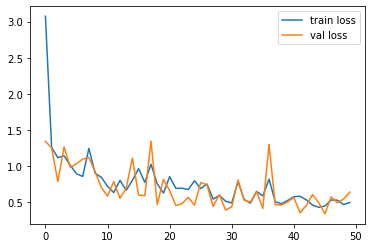

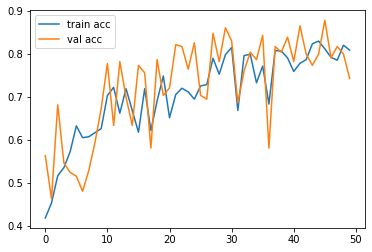

<Figure size 432x288 with 0 Axes>

In [16]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [17]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.hdf5')

In [18]:

y_pred = model.predict(test_set)


In [19]:
y_pred

array([[2.06287071e-01, 7.60535300e-01, 3.31776403e-02],
       [1.29985518e-03, 9.98665452e-01, 3.46763918e-05],
       [9.99972939e-01, 9.64884748e-06, 1.74499910e-05],
       [3.67736846e-01, 4.70248401e-01, 1.62014753e-01],
       [9.81144190e-01, 1.85353365e-02, 3.20515624e-04],
       [4.68577623e-01, 5.14851809e-01, 1.65705252e-02],
       [8.94011021e-01, 6.61808241e-04, 1.05327182e-01],
       [6.09471083e-01, 3.84405971e-01, 6.12297701e-03],
       [6.39554739e-01, 3.20855409e-01, 3.95898148e-02],
       [5.77531708e-03, 9.94004548e-01, 2.20220580e-04],
       [5.35421111e-02, 9.45981979e-01, 4.75896435e-04],
       [7.45959207e-02, 9.19336379e-01, 6.06770068e-03],
       [8.95284474e-01, 3.47509421e-02, 6.99646100e-02],
       [9.79479849e-01, 2.04285514e-02, 9.16650170e-05],
       [7.92150497e-02, 9.17916119e-01, 2.86872312e-03],
       [7.23347604e-01, 2.63134718e-01, 1.35176294e-02],
       [2.96377856e-03, 1.23204976e-01, 8.73831272e-01],
       [1.82438165e-01, 3.82245

In [20]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [21]:
y_pred

array([1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 2, 2, 1, 1, 1, 0,
       0, 0, 1, 1, 2, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 0, 1, 2, 2, 0, 2, 0, 1,
       0, 1, 1, 2, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 2, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 2, 0,
       0, 1, 0, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 2, 2, 2,
       0, 0, 2, 1, 0, 2, 0, 2, 1, 1, 1, 0, 1, 1, 0, 2, 0, 1, 0, 2, 0, 0,
       1, 2, 1, 0, 1, 2, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 0,
       1, 0, 2, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       2, 1, 2, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 2, 0, 2, 1, 0, 0,
       0, 0, 1, 0, 0, 2, 1, 1, 1])

In [86]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [87]:
model=load_model('model_resnet50.hdf5')

In [88]:
img=image.load_img('/content/drive/My Drive/Datasets/Test/audi/3.jpg',target_size=(224,224))



In [89]:
image = image.img_to_array(img)

image = image/255.  

image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

model.predict(image)




array([[9.9902463e-01, 9.7175874e-04, 3.6241267e-06]], dtype=float32)

In [90]:
a=np.argmax(model.predict(image),axis=1)
a

array([0])

In [58]:
!pip install streamlit

In [91]:
%%writefile app.py
import streamlit as st
import tensorflow as tf

st.set_option('deprecation.showfileUploaderEncoding', False)
@st.cache(allow_output_mutation=True)
def load_model():
  model=tf.keras.models.load_model('/content/model_resnet50.hdf5')
  return model
model=load_model()
st.write("""
         # Car Brand Classification
         """
         )

file = st.file_uploader("Please upload a car image", type=["jpg","png"])
import cv2
from PIL import Image, ImageOps
import numpy as np
def import_and_predict(image_data, model):

        size = (224,224)
        image = ImageOps.fit(image_data, size, Image.ANTIALIAS)
        img = np.asarray(image)
        img_reshape = img[np.newaxis,...]
        prediction = model.predict(img_reshape)

        return prediction 
if file is None:
    st.text("Please upload an image file")
else:
    image = Image.open(file)
    st.image(image, use_column_width=True)
    predictions = import_and_predict(image, model)
    class_names=['audi','lamborghini','mercedes']
    string="This image most likely is: "+class_names[np.argmax(predictions)]
    st.success(string)


Overwriting app.py


In [60]:
!pip install pyngrok

In [92]:
!ngrok authtoken 1ibGznAXU4EhunokYxtVrF85Cl7_7oWrpL34PKnXD9ecDrRy1

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [93]:
!nohup streamlit run app.py &

nohup: appending output to 'nohup.out'


In [94]:
from pyngrok import ngrok
url=ngrok.connect(port=8501)
url

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Support for "return_ngrok_tunnel" as "False" is deprecated and will be removed in 5.0.0, when this method will return a NgrokTunnel instead of a str
  


'http://0ab9971d0924.ngrok.io'

In [64]:
!cat /content/nohup.out

2020-10-12 16:45:08.733879: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://35.240.155.31:8501

2020-10-12 16:45:10.063768: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2020-10-12 16:45:10.067823: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-10-12 16:45:10.068166: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P4 computeCapability: 6.1
coreClock: 1.1135GHz coreCount: 20 deviceMemorySize: 7.43GiB deviceMemoryBandwidth: 178.99GiB/s
2020-10-12 16:45:10.068221: I tensorflow/stream_executor/platform/default/dso_lo